In [1]:
'''Assignment 9: Firstly we initialized the importing the tensorflow and keras with Elements and then queru-ying data from 
Pymatgen and mendeleev then 

Part 1: with variable optimisers we will learn the best optimiser
Part 2 :with variable units in a layer we will see the optimum units
Part 3: with variable activation function we will learn the best range of data'''

'Assignment 9: Firstly we initialized the importing the tensorflow and keras with Elements and then queru-ying data from \nPymatgen and mendeleev then \nPart 1: with variable optimisers we will learn the best optimiser\nPart 2 :with variable units in a layer we will see the optimum units\nPart 3: with variable activation function we will learn the best range of data'

In [2]:
import tensorflow as tf

import keras
from keras import initializers
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers

import pymatgen.core as pymat
import mendeleev as mendel
import pandas as pd
import numpy as np


import sys
import os
sys.path.insert(0, '../src/')

%matplotlib inline
import matplotlib.pyplot as plt

fcc_elements = ["Ag", "Al", "Au", "Cu", "Ir", "Ni", "Pb", "Pd", "Pt", "Rh", "Th", "Yb"]
bcc_elements = ["Ba", "Cr", "Cs", "Eu", "Fe", "Li", "Mn", "Mo", "Na", "Nb", "Rb", "Ta", "V", "W" ]
hcp_elements = ["Be", "Ca", "Cd", "Co", "Dy", "Er", "Gd", "Hf", "Ho", "Lu", "Mg", "Re", 
                "Ru", "Sc", "Tb", "Ti", "Tl", "Tm", "Y", "Zn", "Zr"]
others = ["Si", "Ge"] # "Si" and "Ge" are Face-centered diamond-cubic;

elements = fcc_elements + others + bcc_elements + hcp_elements

querable_mendeleev = ["atomic_number", "atomic_volume", "boiling_point",
                      "en_ghosh",  "evaporation_heat", "heat_of_formation",
                     "lattice_constant", "specific_heat"]
querable_pymatgen = ["atomic_mass", "atomic_radius", "electrical_resistivity",
                     "molar_volume", "bulk_modulus", "youngs_modulus",
                     "average_ionic_radius", "density_of_solid",
                     "coefficient_of_linear_thermal_expansion"]

querable_values = querable_mendeleev + querable_pymatgen

In [3]:
all_values = [] # Values for Attributes
all_labels = [] # Values for Young's Modulus (Property to be estimated)

for item in elements:
    element_values = []
    
    # This section queries Mendeleev
    element_object = mendel.element(item)
    for i in querable_mendeleev:    
        element_values.append(getattr(element_object,i))

    # This section queries Pymatgen
    element_object = pymat.Element(item)    
    for i in querable_pymatgen:
        element_values.append(getattr(element_object,i))
        
    all_values.append(element_values) # All lists are appended to another list, creating a list of lists
    
# Pandas Dataframe
df = pd.DataFrame(all_values, columns=querable_values)


index_Cs = df.index[df['atomic_number'] == 55]
df.iloc[index_Cs, df.columns.get_loc("coefficient_of_linear_thermal_expansion")] = 0.000097 

index_Rb = df.index[df['atomic_number'] == 37]
df.iloc[index_Rb, df.columns.get_loc("coefficient_of_linear_thermal_expansion")] = 0.000090 

index_Ru = df.index[df['atomic_number'] == 44]
df.iloc[index_Ru, df.columns.get_loc("evaporation_heat")] = 595 # kJ/mol 

index_Zr = df.index[df['atomic_number'] == 40]
df.iloc[index_Zr, df.columns.get_loc("bulk_modulus")] = 94 # GPa 
# Value from: https://materialsproject.org/materials/mp-131/

# Value for the Bulk Modulus of Germanium
index_Ge = df.index[df['atomic_number'] == 32]
df.iloc[index_Ge, df.columns.get_loc("bulk_modulus")] = 77.2 # GPa 
# Value from: https://www.crystran.co.uk/optical-materials/germanium-ge

# Value for the Young's Modulus of Germanium
index_Ge = df.index[df['atomic_number'] == 32]
df.iloc[index_Ge, df.columns.get_loc("youngs_modulus")] = 102.7 # GPa 
# Value from: https://www.crystran.co.uk/optical-materials/germanium-ge


# The labels (values for Young's modulus) are stored separately for clarity (We drop the column later)

df.to_csv(os.path.expanduser('~/mseml_data.csv'), index=False, compression=None) # this line saves the data we collected into a .csv file into your home directory

all_labels = df['youngs_modulus'].tolist()
df = df.drop(['youngs_modulus'], axis=1)

df.head(n=10) # With this line you can see the first ten entries of our database

,atomic_number,atomic_volume,boiling_point,en_ghosh,evaporation_heat,heat_of_formation,lattice_constant,specific_heat,atomic_mass,atomic_radius,electrical_resistivity,molar_volume,bulk_modulus,average_ionic_radius,density_of_solid,coefficient_of_linear_thermal_expansion
0,47,10.30,2485.0,0.147217,254.1,284.9,4.09,0.237,107.868200,1.60,1.630000e-08,10.27,100.0,1.086667,10490.0,0.000019
1,13,10.00,2740.0,0.150078,284.1,330.9,4.05,0.900,26.981539,1.25,2.700000e-08,10.00,76.0,0.675000,2700.0,0.000023
2,79,10.20,3080.0,0.261370,340.0,368.2,4.08,0.129,196.966569,1.35,2.200000e-08,10.21,220.0,1.070000,19300.0,0.000014
3,29,7.10,2840.0,0.151172,304.6,337.4,3.61,0.385,63.546000,1.35,1.720000e-08,7.11,140.0,0.820000,8920.0,0.000017
4,77,8.54,4403.0,0.251060,604.0,669.0,3.84,0.133,192.217000,1.35,4.700000e-08,8.52,320.0,0.765000,22650.0,0.000006
5,28,6.60,3005.0,0.147207,378.6,430.1,3.52,0.443,58.693400,1.35,7.200000e-08,6.59,180.0,0.740000,8908.0,0.000013
6,82,18.30,2013.0,0.177911,177.8,195.2,4.95,0.159,207.200000,1.80,2.100000e-07,18.26,46.0,1.122500,11340.0,0.000029
7,46,8.90,3413.0,0.144028,372.4,376.6,3.89,0.244,106.420000,1.40,1.080000e-07,8.56,180.0,0.846250,12023.0,0.000012
8,78,9.10,4100.0,0.256910,470.0,565.7,3.92,0.133,195.084000,1.35,1.060000e-07,9.09,230.0,0.805000,21090.0,0.000009
9,45,8.30,4000.0,0.140838,494.0,556.0,3.80,0.244,102.905500,1.35,4.300000e-08,8.28,380.0,0.745000,12450.0,0.000008


In [4]:

all_values = [list(df.iloc[x]) for x in range(len(all_values))]

all_values = np.array(all_values, dtype = float) 
print("Shape of Values:", all_values.shape)
all_labels = np.array(all_labels, dtype = float)
print("Shape of Labels:", all_labels.shape)

# Uncomment the line below to shuffle the dataset (we do not do this here to ensure consistent results for every run)
#order = np.argsort(np.random.random(all_labels.shape)) # This numpy argsort returns the indexes that would be used to shuffle a list
order = np.arange(49)
all_values = all_values[order]
all_labels = all_labels[order]

# Training Set
train_labels = all_labels[:44]
train_values = all_values[:44]

# Testing Set
test_labels = all_labels[-5:]
test_values = all_values[-5:]

labeled_elements = [elements[x] for x in order[-5:]] 
elements = [elements[x] for x in order]

# NORMALIZATION

mean = np.mean(train_values, axis = 0) # mean
std = np.std(train_values, axis = 0) # standard deviation

train_values = (train_values - mean) / std # input scaling
test_values = (test_values - mean) / std # input scaling

print(train_values[0]) # print a sample entry from the training set
print(test_values[0]) # print a sample entry from the training set
print(order)

Shape of Values: (49, 16)
Shape of Labels: (49,)
[ 0.03635373 -0.4602946  -0.48361459 -0.42975929 -0.55419253 -0.53925649
  0.11365477 -0.36227363 -0.03999321  0.14325452 -0.20822226 -0.45484424
 -0.1874737   0.56763589  0.31632766  0.02259419]
[ 1.43084567  0.09033955 -1.04659463  0.12995488 -1.04158432 -1.04927398
 -0.41055658 -0.5533928   1.48190695  1.13849646 -0.20741199  0.10038856
 -0.75794692  1.53039692  0.55449179  0.55865246]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]


## Ques1 : For learning rate 0.001, epochs 20000 and other default setup, run the model for RMSProp, Adam and Gradient Descent and compare the loss vs. epochs.

In [5]:
from sklearn.metrics import mean_absolute_error

In [9]:
# For the learning rate of 0.001, epochs = 20000 with RMS prop optimiser
kernel_init = initializers.RandomNormal(seed=0)
bias_init = initializers.Zeros()

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(train_values.shape[1], ), kernel_initializer=kernel_init, bias_initializer=bias_init))
model.add(Dense(32, activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init))
model.add(Dense(1, kernel_initializer=kernel_init, bias_initializer=bias_init))


optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001) # Root Mean Squared Propagation

model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 849
Trainable params: 849
Non-trainable params: 0
_________________________________________________________________


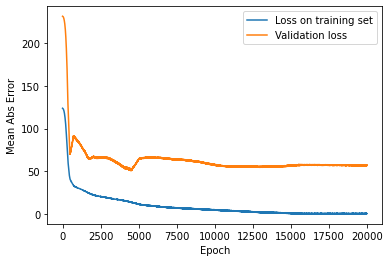

In [10]:
# EPOCH REAL TIME COUNTER CLASS
class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
    def on_epoch_end(self, epoch, logs):
        sys.stdout.flush()
        sys.stdout.write("Current Epoch: " + str(epoch+1) + " Training Loss: " + "%4f" %logs.get('loss') + '                                       \r') # Updates current Epoch Number

EPOCHS = 20000 # Number of EPOCHS

# HISTORY Object which contains how the model learned

# Training Values (Properties), Training Labels (Known Young's Moduli) 
history = model.fit(train_values, train_labels, batch_size=train_values.shape[0], 
                    epochs=EPOCHS, verbose = False, shuffle=False, validation_split=0.1, callbacks=[PrintEpNum()])


# PLOTTING HISTORY USING MATPLOTLIB

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(history.epoch, np.array(history.history['loss']),label='Loss on training set') 
plt.plot(history.epoch, np.array(history.history['val_loss']),label = 'Validation loss')
plt.legend()
plt.show()

In [11]:
[loss, mae] = model.evaluate(test_values, test_labels, verbose=0)

print("Testing Set Mean Absolute Error: {:2.2f} GPa".format(mae))

Testing Set Mean Absolute Error: 40.42 GPa


## Question 1: Part2

In [23]:
# For the learning rate of 0.001, epochs = 20000 with Adam optimiser
kernel_init = initializers.RandomNormal(seed=0)
bias_init = initializers.Zeros()

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(train_values.shape[1], ), kernel_initializer=kernel_init, bias_initializer=bias_init))
model.add(Dense(32, activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init))
#model.add(Dense(128, activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init))
model.add(Dense(1, activation = 'relu',kernel_initializer=kernel_init, bias_initializer=bias_init))


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # Adam optimiser

model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_19 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 33        
Total params: 849
Trainable params: 849
Non-trainable params: 0
_________________________________________________________________


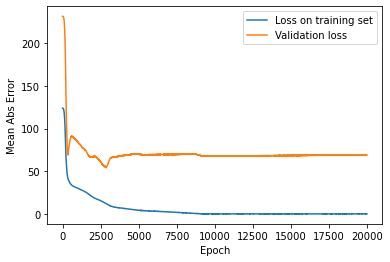

In [24]:
class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
    def on_epoch_end(self, epoch, logs):
        sys.stdout.flush()
        sys.stdout.write("Current Epoch: " + str(epoch+1) + " Training Loss: " + "%4f" %logs.get('loss') + '                                       \r') # Updates current Epoch Number

EPOCHS = 20000 


history = model.fit(train_values, train_labels, batch_size=train_values.shape[0], 
                    epochs=EPOCHS, verbose = False, shuffle=False, validation_split=0.1, callbacks=[PrintEpNum()])


plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(history.epoch, np.array(history.history['loss']),label='Loss on training set') 
plt.plot(history.epoch, np.array(history.history['val_loss']),label = 'Validation loss')
plt.legend()
plt.show()


## Question 1: Part3

In [6]:
# For the learning rate of 0.001, epochs = 20000 with Gradient descent optimiser
kernel_init = initializers.RandomNormal(seed=0)
bias_init = initializers.Zeros()

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(train_values.shape[1], ), kernel_initializer=kernel_init, bias_initializer=bias_init))
model.add(Dense(32, activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init))
#model.add(Dense(128, activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init))
model.add(Dense(1, activation = 'relu',kernel_initializer=kernel_init, bias_initializer=bias_init))


optimizer = tf.keras.optimizers.SGD(learning_rate=0.001) #Gradient descennt optimiser

model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 849
Trainable params: 849
Non-trainable params: 0
_________________________________________________________________


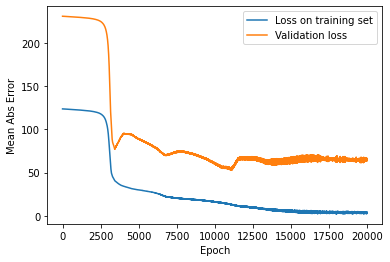

In [7]:
class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
    def on_epoch_end(self, epoch, logs):
        sys.stdout.flush()
        sys.stdout.write("Current Epoch: " + str(epoch+1) + " Training Loss: " + "%4f" %logs.get('loss') + '                                       \r') # Updates current Epoch Number

EPOCHS = 20000 


history = model.fit(train_values, train_labels, batch_size=train_values.shape[0], 
                    epochs=EPOCHS, verbose = False, shuffle=False, validation_split=0.1, callbacks=[PrintEpNum()])


plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(history.epoch, np.array(history.history['loss']),label='Loss on training set') 
plt.plot(history.epoch, np.array(history.history['val_loss']),label = 'Validation loss')
plt.legend()
plt.show()

In [35]:
'''AdAM optimiser is the best optimiser in this case for the prediction purpose and gradient descent converges very slow and perform poor'''

'AdAM optimiser is the best optimiser in this case for the prediction purpose and gradient descent converges very slow and perform poor'

## Ques 2: For learning rate 0.01, epochs 20000 and other default setup, run the model for Adam Optimizer for 16 units, 32 units and 64 units in the first layer and compare the loss vs. epochs

In [19]:
# For the learning rate of 0.01, epochs = 20000 with Adam optimiser with 16 units
kernel_init = initializers.RandomNormal(seed=0)
bias_init = initializers.Zeros()

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(train_values.shape[1], ), kernel_initializer=kernel_init, bias_initializer=bias_init))
model.add(Dense(32, activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init))
#model.add(Dense(128, activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init))
model.add(Dense(1, activation = 'relu',kernel_initializer=kernel_init, bias_initializer=bias_init))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01) # Adam optimiser


model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_25 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 33        
Total params: 849
Trainable params: 849
Non-trainable params: 0
_________________________________________________________________


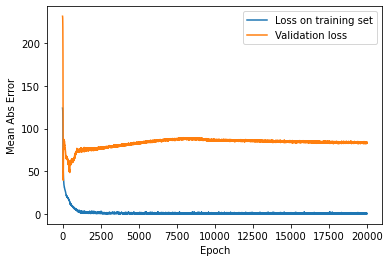

In [20]:
class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
    def on_epoch_end(self, epoch, logs):
        sys.stdout.flush()
        sys.stdout.write("Current Epoch: " + str(epoch+1) + " Training Loss: " + "%4f" %logs.get('loss') + '                                       \r') # Updates current Epoch Number

EPOCHS = 20000 


history = model.fit(train_values, train_labels, batch_size=train_values.shape[0], 
                    epochs=EPOCHS, verbose = False, shuffle=False, validation_split=0.1, callbacks=[PrintEpNum()])


plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(history.epoch, np.array(history.history['loss']),label='Loss on training set') 
plt.plot(history.epoch, np.array(history.history['val_loss']),label = 'Validation loss')
plt.legend()
plt.show()

## Question 2: part 2

In [21]:
# For the learning rate of 0.01, epochs = 20000 with Adam optimiser with 32 units
kernel_init = initializers.RandomNormal(seed=0)
bias_init = initializers.Zeros()

model = Sequential()
# model contains 32 neurons in the initial layer and let see the results
model.add(Dense(32, activation='relu', input_shape=(train_values.shape[1], ), kernel_initializer=kernel_init, bias_initializer=bias_init))
model.add(Dense(32, activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init))
model.add(Dense(1, activation = 'relu',kernel_initializer=kernel_init, bias_initializer=bias_init))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01) # Adam optimiser


model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_28 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 33        
Total params: 1,633
Trainable params: 1,633
Non-trainable params: 0
_________________________________________________________________


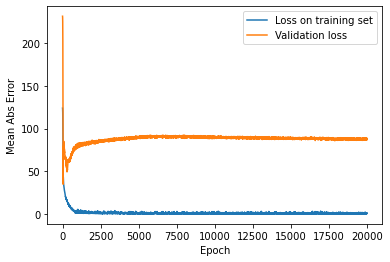

In [22]:
class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
    def on_epoch_end(self, epoch, logs):
        sys.stdout.flush()
        sys.stdout.write("Current Epoch: " + str(epoch+1) + " Training Loss: " + "%4f" %logs.get('loss') + '                                       \r') # Updates current Epoch Number

EPOCHS = 20000 


history = model.fit(train_values, train_labels, batch_size=train_values.shape[0], 
                    epochs=EPOCHS, verbose = False, shuffle=False, validation_split=0.1, callbacks=[PrintEpNum()])


plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(history.epoch, np.array(history.history['loss']),label='Loss on training set') 
plt.plot(history.epoch, np.array(history.history['val_loss']),label = 'Validation loss')
plt.legend()
plt.show()

## Question 2: part 3


In [28]:
# For the learning rate of 0.01, epochs = 20000 with Adam optimiser with 16 units
kernel_init = initializers.RandomNormal(seed=0)
bias_init = initializers.Zeros()

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_values.shape[1], ), kernel_initializer=kernel_init, bias_initializer=bias_init))
model.add(Dense(32, activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init))
#model.add(Dense(128, activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init))
model.add(Dense(1, activation = 'relu',kernel_initializer=kernel_init, bias_initializer=bias_init))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01) # Adam optimiser


model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 64)                1088      
_________________________________________________________________
dense_37 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 33        
Total params: 3,201
Trainable params: 3,201
Non-trainable params: 0
_________________________________________________________________


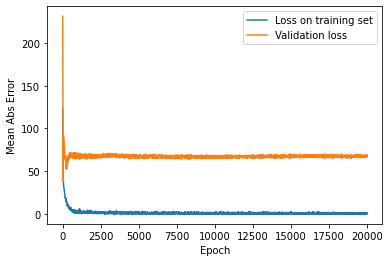

In [29]:
class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
    def on_epoch_end(self, epoch, logs):
        sys.stdout.flush()
        sys.stdout.write("Current Epoch: " + str(epoch+1) + " Training Loss: " + "%4f" %logs.get('loss') + '                                       \r') # Updates current Epoch Number

EPOCHS = 20000 


history = model.fit(train_values, train_labels, batch_size=train_values.shape[0], 
                    epochs=EPOCHS, verbose = False, shuffle=False, validation_split=0.1, callbacks=[PrintEpNum()])


plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(history.epoch, np.array(history.history['loss']),label='Loss on training set') 
plt.plot(history.epoch, np.array(history.history['val_loss']),label = 'Validation loss')
plt.legend()
plt.show()

In [36]:
'''Increasing the number of units in first layer will lead to overfitting of the model where 16 units are the optimum units followed by 64 and finally 32 least optimum'''

'Increasing the number of units in first layer will lead to overfitting of the model where 16 units are the optimum units followed by 64 and finally 32 least optimum'

## Ques 3: For learning rate 0.01, epochs 20000 and other default setup, run the model for Adam Optimizer for ReLU, tanh and softmax activation functions in the hidden layer and compare the loss vs. epochs.

In [19]:
# For the learning rate of 0.01, epochs = 20000 with Adam optimiser with RelU activation function
kernel_init = initializers.RandomNormal(seed=0)
bias_init = initializers.Zeros()

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(train_values.shape[1], ), kernel_initializer=kernel_init, bias_initializer=bias_init))
model.add(Dense(32, activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init))
#model.add(Dense(128, activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init))
model.add(Dense(1, activation = 'relu',kernel_initializer=kernel_init, bias_initializer=bias_init))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01) # Adam optimiser


model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_25 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 33        
Total params: 849
Trainable params: 849
Non-trainable params: 0
_________________________________________________________________


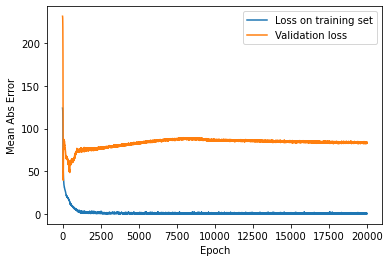

In [20]:
class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
    def on_epoch_end(self, epoch, logs):
        sys.stdout.flush()
        sys.stdout.write("Current Epoch: " + str(epoch+1) + " Training Loss: " + "%4f" %logs.get('loss') + '                                       \r') # Updates current Epoch Number

EPOCHS = 20000 


history = model.fit(train_values, train_labels, batch_size=train_values.shape[0], 
                    epochs=EPOCHS, verbose = False, shuffle=False, validation_split=0.1, callbacks=[PrintEpNum()])


plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(history.epoch, np.array(history.history['loss']),label='Loss on training set') 
plt.plot(history.epoch, np.array(history.history['val_loss']),label = 'Validation loss')
plt.legend()
plt.show()

## Question 3: part 2

In [30]:
# For the learning rate of 0.01, epochs = 20000 with Adam optimiser with tanh activation function.
kernel_init = initializers.RandomNormal(seed=0)
bias_init = initializers.Zeros()

model = Sequential()
model.add(Dense(16, activation='tanh', input_shape=(train_values.shape[1], ), kernel_initializer=kernel_init, bias_initializer=bias_init))
model.add(Dense(32, activation='tanh', kernel_initializer=kernel_init, bias_initializer=bias_init))
#model.add(Dense(128, activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init))
model.add(Dense(1,kernel_initializer=kernel_init, bias_initializer=bias_init))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01) # Adam optimiser


model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_40 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 33        
Total params: 849
Trainable params: 849
Non-trainable params: 0
_________________________________________________________________


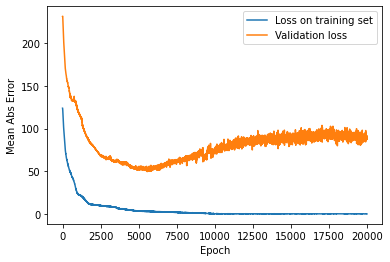

In [31]:
class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
    def on_epoch_end(self, epoch, logs):
        sys.stdout.flush()
        sys.stdout.write("Current Epoch: " + str(epoch+1) + " Training Loss: " + "%4f" %logs.get('loss') + '                                       \r') # Updates current Epoch Number

EPOCHS = 20000 


history = model.fit(train_values, train_labels, batch_size=train_values.shape[0], 
                    epochs=EPOCHS, verbose = False, shuffle=False, validation_split=0.1, callbacks=[PrintEpNum()])


plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(history.epoch, np.array(history.history['loss']),label='Loss on training set') 
plt.plot(history.epoch, np.array(history.history['val_loss']),label = 'Validation loss')
plt.legend()
plt.show()

## Question 3: part 3

In [32]:
# For the learning rate of 0.01, epochs = 20000 with Adam optimiser with softmax activation function.
kernel_init = initializers.RandomNormal(seed=0)
bias_init = initializers.Zeros()

model = Sequential()
model.add(Dense(16, activation='softmax', input_shape=(train_values.shape[1], ), kernel_initializer=kernel_init, bias_initializer=bias_init))
model.add(Dense(32, activation='softmax', kernel_initializer=kernel_init, bias_initializer=bias_init))
#model.add(Dense(128, activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init))
model.add(Dense(1,kernel_initializer=kernel_init, bias_initializer=bias_init))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01) # Adam optimiser


model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_43 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 33        
Total params: 849
Trainable params: 849
Non-trainable params: 0
_________________________________________________________________


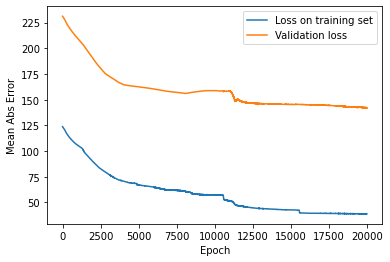

In [33]:
class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
    def on_epoch_end(self, epoch, logs):
        sys.stdout.flush()
        sys.stdout.write("Current Epoch: " + str(epoch+1) + " Training Loss: " + "%4f" %logs.get('loss') + '                                       \r') # Updates current Epoch Number

EPOCHS = 20000 


history = model.fit(train_values, train_labels, batch_size=train_values.shape[0], 
                    epochs=EPOCHS, verbose = False, shuffle=False, validation_split=0.1, callbacks=[PrintEpNum()])


plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(history.epoch, np.array(history.history['loss']),label='Loss on training set') 
plt.plot(history.epoch, np.array(history.history['val_loss']),label = 'Validation loss')
plt.legend()
plt.show()

In [37]:
'''ReLu activation function works best for the optimization problem, we see that errors are set to increase in tanh function whereas we see a large variation in training and validation in softmax function
best is relu worst is softmax'''

'ReLu activation function works best for the optimization problem, we see that errors are set to increase in tanh function whereas we see a large variation in training and validation in softmax function\nbest is relu worst is softmax'

#### SAVING A MODEL

Compiled and trained models in Keras can be saved and distributed in .h5 files using the `model.save()` method. Running the cell below will save the current model we trained, both weights and architecture to your home directory.

In [14]:
model.save(os.path.expanduser('~/model.h5'))